In [3]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import eulerN as arch 
import torch
from torch import nn
# warnings.filterwarnings('ignore')

In [4]:
Vo = torch.tensor(np.load('../data/L63-trajectories/test.npy'))
L0, L1 = 0.4, 3.5
beta = 7e-8
training_points = 20000
n_repeats = 500
tau_f_kwargs = {'error_threshold' : 0.05, 'dt': 0.02, 'Lyapunov_time': 1/0.91}

In [6]:
# Look for optimal beta
D_r_list, B_list, normalize, save_best = [32], [1], False, True
Uo = [torch.tensor(np.load(f'../data/L63-trajectories/train{B}.npy')) for B in B_list]
drf_args = [64, 1, L0, L1, Uo[0], beta, 'EulerN', f"../data/L63/EulerN/beta", normalize]
bt = arch.BetaTester(D_r_list, B_list, Uo, Vo, *drf_args)
bt.search_beta(negative_log10_range = [7, 11], resolution=50, n_repeats=25, training_points=training_points, **tau_f_kwargs)

Running experiments for (D_r, B, beta) = (32, 1, 1.00E-11)...
Time taken by learn is 0.0046 seconds
Time taken by learn is 0.0039 seconds
Time taken by learn is 0.0036 seconds
Time taken by learn is 0.0034 seconds
Time taken by learn is 0.0027 seconds
Time taken by learn is 0.0027 seconds
Time taken by learn is 0.0025 seconds
Time taken by learn is 0.0026 seconds
Time taken by learn is 0.0027 seconds
Time taken by learn is 0.0027 seconds
Time taken by learn is 0.0026 seconds
Time taken by learn is 0.0026 seconds
Time taken by learn is 0.0025 seconds
Time taken by learn is 0.0026 seconds
Time taken by learn is 0.0025 seconds
Time taken by learn is 0.0025 seconds
Time taken by learn is 0.0027 seconds
Time taken by learn is 0.0027 seconds
Time taken by learn is 0.0025 seconds
Time taken by learn is 0.0025 seconds
Time taken by learn is 0.0026 seconds
Time taken by learn is 0.0025 seconds
Time taken by learn is 0.0025 seconds
Time taken by learn is 0.0027 seconds
Time taken by learn is 0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '')

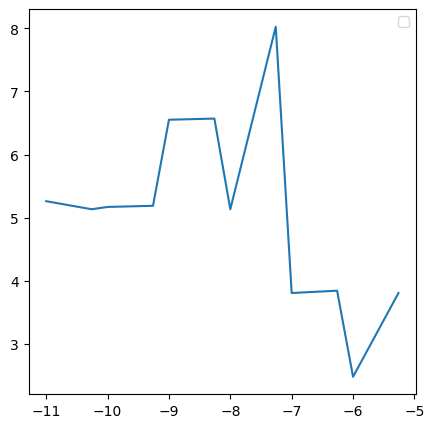

In [12]:
batch = arch.BatchDeepRF(Uo[0], Vo, *drf_args)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
data = batch.get_beta_data()
# sns.histplot(tau_f, ax=ax, label=r'$\mathbb{E}[\tau_f]$'+f'={tau_f.mean():.2f}', alpha=0.7, stat='probability')
ax.plot(np.log10(data['beta']), data['tau_f_nmse'])
ax.legend()
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_title(fr'architecture=EulerN, $D_r$={}, depth={batch.drf.net.B}')
# plt.savefig(f'{batch.drf.save_folder}/tau_f.png', bbox_inches='tight', dpi=300)

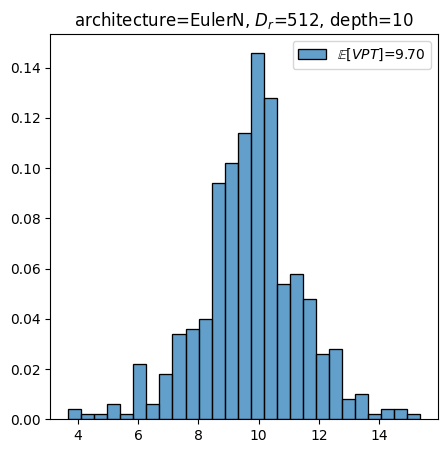

In [22]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
tau_f = batch.get_data()['tau_f_nmse']
sns.histplot(tau_f, ax=ax, label=r'$\mathbb{E}[VPT]$'+f'={tau_f.mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(fr'architecture=EulerN, $D_r$={D_r}, depth={batch.drf.net.B}')
plt.savefig(f'{batch.drf.save_folder}/tau_f_nmse.png', bbox_inches='tight', dpi=300)

In [7]:
Vo[311].shape

torch.Size([3, 1000])

In [8]:
1000/55

18.181818181818183

In [15]:
beta

7.300000000000001e-09

In [10]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

In [11]:
6*

600

In [12]:
print(f"{4*10**(-7):.2E}")

4.00E-07


In [13]:
(np.linspace(1., 10., 20, endpoint=False) * 10**(-5.)).sort()

In [2]:
2**-19

1.9073486328125e-06

In [8]:
list(range(int(6), int(11)))

[6, 7, 8, 9, 10]

In [9]:
20*5*10*25

25000

In [5]:
a = np.random.normal(size=(4, 3))
a

array([[ 0.22450159,  0.58220649, -1.48465607],
       [ 1.56529138, -1.42774678, -2.64310369],
       [ 0.47076183, -1.05742125,  0.72033661],
       [-0.86250488, -1.70546451,  1.50159028]])

In [8]:
np.random.shuffle(a)

In [9]:
a

array([[ 0.47076183, -1.05742125,  0.72033661],
       [ 1.56529138, -1.42774678, -2.64310369],
       [-0.86250488, -1.70546451,  1.50159028],
       [ 0.22450159,  0.58220649, -1.48465607]])

In [6]:
float(torch.tensor(0.1638))

0.1638